# Introduction

The main question I want to answer with this is how does the artist Kendrick Lamar express his culture and political ideologies through musical features and lyrics in his songs.

# Why is it important

Kendrick Lamar and many artists like him take years to release new albums although adored many overlook the intricate details they put in their songs.  These intricate details reveal a lot about their perspectives on the world. Kendrick Lamar is a black american who grew up in Compton during America's crack/cocaine epidemic. Not many from that background reach a level of success where they have the oppurtunity to articulate their perspective on the world based on their experience and have people listen. I believe it is important to hear these perspectives as we are often not afforded the oppurtunity to hear perspectives that are like this unless you come from that area.

# Other Work Done in this area

People have analyzed Kendrick Lamars perspective and influence on black american culture and politics before. Bettina L. Love covers this in her journal article "Good Kids, Mad Cities: Kendrick Lamar and Finding Inner Resistance in Response to FergusonUSA" (https://doi.org/10.1177/1532708616634837) where she analyzes the effect and relationship of his music with black youth growing up during the black live matter movement. Focusing mainly on Kendrick Lamar's messages of ressistance and the different ways he tells young black and brown listeners that can resist in ways such as focusing on one's inner self and self improvement.  Kendrick Lamar's music and popularity amoung younger generation is an interest of many people doing abolitionist teachings like Bettina L. Love or researchers just concerned with the black live matter movement.  Kendrick talks a lot about his views on politics and culture and it is not a surprise that his music is often imparting a lot of values and perspectives on his audience. Understanding the depth of what Kendrick is saying and how he communicates it is effective because it can help these researchers and teachers understand what type of perspective young audiences are getting from their media.

In [27]:
import spotipy, requests, urllib3
import pandas as pd
import time
from spotipy.oauth2 import SpotifyClientCredentials
session = requests.Session()
cid = 'dbeeee5d8ac741cdae4d7ad5ca88ad9f'
secret = '268b56af0cbb4570a35fbe4fdb01328d'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

sp = spotipy.Spotify(
auth_manager=spotipy.SpotifyPKCE(
client_id=cid,
redirect_uri = 'http://localhost:3000',
scope="",
state=None,
cache_handler=spotipy.CacheFileHandler()
),
requests_session=session
)

In [28]:
artist_name = "Kendrick Lamar"
artist_id = '2YZyLoL8N0Wb9xBt1NhZWg'

In [30]:
def get_artist_albums(artist_id, album_type=None, country=None, limit=20, offset=0):
    albums = sp.artist_albums(artist_id, album_type=album_type, country=country, limit=limit, offset=offset)
    return albums['items']

def create_album_dataframe_1(artist_id, album_type=None, country=None, limit=20, offset=0):
    albums = get_artist_albums(artist_id, album_type=album_type, country=country, limit=limit, offset=offset)
    album_data = {
        'Album Name': [],
        'Release Date': [],
        'Album Type': []
    }
    for album in albums:
        album_data['Album Name'].append(album['name'])
        album_data['Release Date'].append(album['release_date'])
        album_data['Album Type'].append(album['album_type'])
    df = pd.DataFrame(album_data)
    return df
df_poo = create_album_dataframe_1(artist_id)
df_poo

,Album Name,Release Date,Album Type
0,Mr. Morale & The Big Steppers,2022-05-13,album
1,Black Panther The Album Music From And Inspire...,2018-02-09,album
2,DAMN. COLLECTORS EDITION.,2017-12-08,album
3,DAMN.,2017-04-14,album
4,untitled unmastered.,2016-03-04,album
5,To Pimp A Butterfly,2015-03-16,album
6,"good kid, m.A.A.d city (Deluxe)",2012,album
7,"good kid, m.A.A.d city",2012,album
8,Section.80,2011-07-02,album
9,Overly Dedicated,2010-09-14,album


# Creating Audio Description Dataset

I decided to create the dataset using the WEBAPI interface online as collecting using spotipy was too computationally expensive when it came to taking many points of data.  The simple queries above were not too taxing on the web api but the features search was. Looking for features or analysis started to result in 429 Client Errors after a few queries because the webapi has a limit to requests, and features has a lot of information so it does not work locally very well. Initially it just took long but it began to just time out in general so I have decide to use the spotify Webapi interface directly and then scrap that into a dataset I have listed as the Kendrck Lamar Dataset.

Some choices I made when creating this dataset is to only take songs from albums this is because in his albums he's usually has a concept that he wants to talk about. With his singles I have noticed those can be diss tracks or movie sound tracks which I think could potentially skew the musical choices he would make.  Because a movie sound track he might just make it more catchy or a diss track more loud which don't really answer my question as effectively which is what choices does he make that reflect his culture and political opinions as an black american. I also decided to choose 4 random songs from each album just incase he was going for a specific style on each album one album's style wouldn't overtake the others because each album has a different number of songs so it might skew the results.

In [53]:
df = pd.read_csv("Kendrick Lamar Dataset - Sheet1.csv")
df

,Track Name,Acousticness,Danceability,Duration(ms),Energy,Id,instrumentalness,key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Albulm
0,Hood Politics,0.145000,0.731,292520,0.661,2UOYzhusMTypF7oAQwksCj,0.000000,6,0.1200,-6.562,0,0.3760,87.912,4,To Pimp A Butterfly
1,Alright,0.074200,0.796,219333,0.766,3iVcZ5G6tvkXZkZKlMpIUs,0.000000,7,0.0827,-5.974,1,0.2380,110.034,4,To Pimp A Butterfly
2,King Kunta,0.005890,0.884,234693,0.657,0N3W5peJUQtI4eyR6GJT5O,0.000000,6,0.1540,-4.569,0,0.0977,107.059,4,To Pimp A Butterfly
3,Momma,0.254000,0.615,283120,0.743,0CjJqkWOpIUXdem5hUcxAk,0.000000,1,0.6650,-4.580,1,0.3250,111.914,5,To Pimp A Butterfly
4,DNA,0.004540,0.638,185947,0.523,6HZILIRieu8S0iqY8kIKhj,0.000000,1,0.0842,-6.664,1,0.3570,139.913,4,DAMN
5,FEEL,0.137000,0.746,214827,0.789,2LTlO3NuNVN70lp2ZbVswF,0.000000,0,0.1390,-8.382,1,0.3490,109.968,4,DAMN
6,PRIDE,0.078600,0.665,275253,0.535,6IZvVAP7VPPnsGX6bvgkqg,0.000017,4,0.1540,-7.056,0,0.0572,138.842,4,DAMN
7,HUMBLE,0.000282,0.908,177000,0.621,7KXjTSCq5nL1LoYtL7XAwS,0.000054,1,0.0958,-6.638,0,0.1020,150.011,4,DAMN
8,"Bitch, Don't Kill My Vibe",0.015100,0.586,310720,0.698,712uvW1Vezq8WpQi38v2L9,0.000000,1,0.4430,-8.948,1,0.0943,133.954,4,"good kid, m.A.A.d city"
9,Money Trees,0.070900,0.716,386907,0.531,0AOvNRgl0SMfOibWA5bP8o,0.000000,7,0.2200,-7.355,1,0.1570,71.972,4,"good kid, m.A.A.d city"


# Variable Descriptions

Here is the discription provided by spotify on what each category means:
acousticness        
number [float]
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
Range: 0 - 1
                         
danceability
number [float]
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
               
energy
number [float]
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
                                   
id
string
The Spotify ID for the track.
                                
instrumentalness
number [float]
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
                                   

key
integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
Range: -1 - 11
                                 
liveness
number [float]
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
                                             
loudness
number [float]
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
                                        
mode
integer
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

                                              
speechiness
number [float]
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
                                                   
tempo
number [float]
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
                                                     

time_signature
integer
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

Range: 3 - 7

# Inital Analysis

General takeaways it seems that Kendrick Lamar in general has very low instrumental which is expected because he is a rap artist so there won't be a lot of moments with no speech. He mostly does songs in 4/4 time but looks like in one situation he did 3/4 and another 5/4. From my experience in band 4/4 is a fairly popular time signature and often will have a more even feel to the beat 3/4 is more waltz like less even and 5/4 is also uneven but more unpredictable than 3/4 the accenting is fairly different from 4/4 and 3/4.

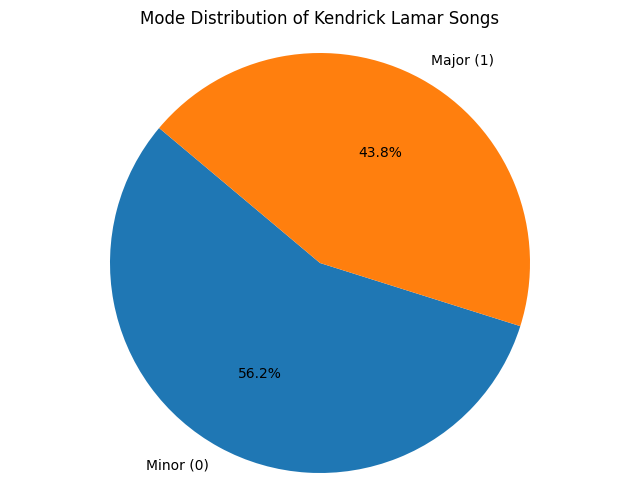

In [54]:
import matplotlib.pyplot as plt
mode_counts = df['Mode'].value_counts()
labels = ['Minor (0)', 'Major (1)']

plt.figure(figsize=(8, 6))
plt.pie(mode_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Mode Distribution of Kendrick Lamar Songs')
plt.axis('equal') 
plt.show()

Looks like his songs are distributed between Major and Minor pretty evenly with a slight lean towards minor.  Minor tends to sound more melaoncholy and sad or eerie than Major keys do this could potentially reflect his subject matter

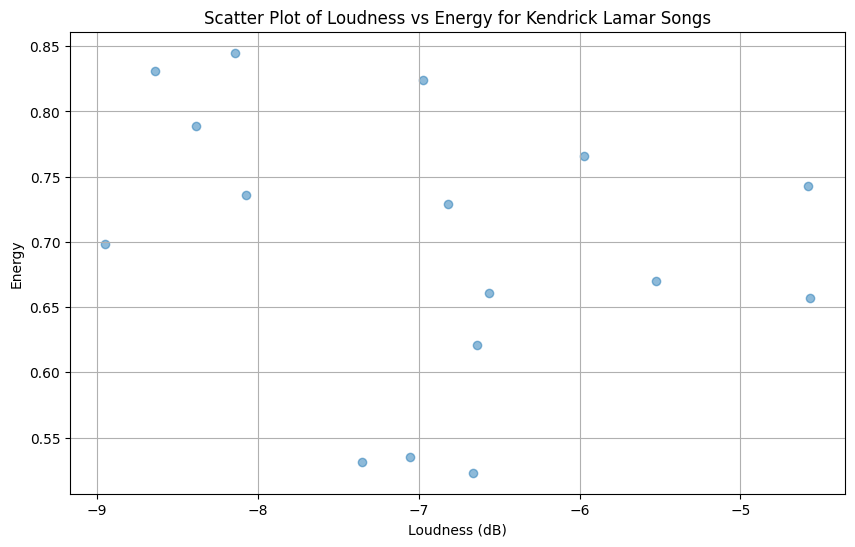

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Loudness'], df['Energy'], alpha=0.8)
plt.title('Scatter Plot of Loudness vs Energy for Kendrick Lamar Songs')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

Not much correlation between being more loud and having more energy

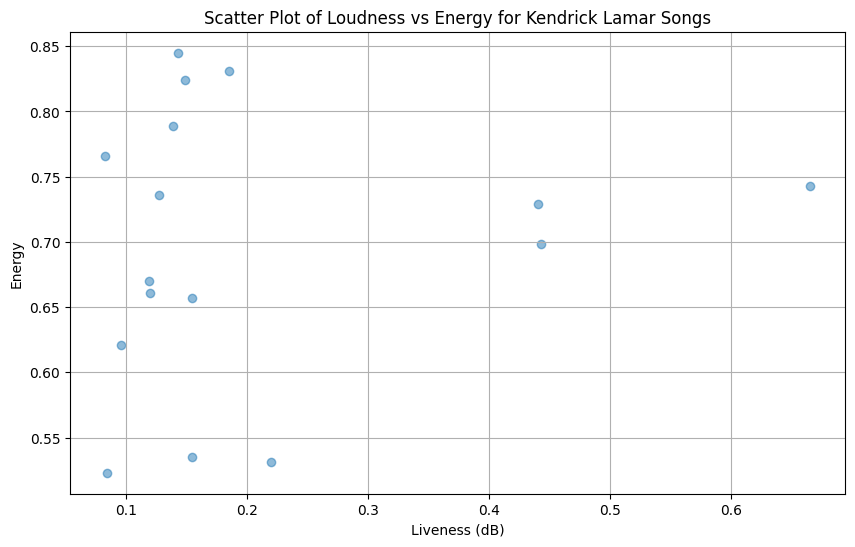

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Liveness'], df['Energy'], alpha=0.8)
plt.title('Scatter Plot of Loudness vs Energy for Kendrick Lamar Songs')
plt.xlabel('Liveness (dB)')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

More of a correlation between these two which makes sense.

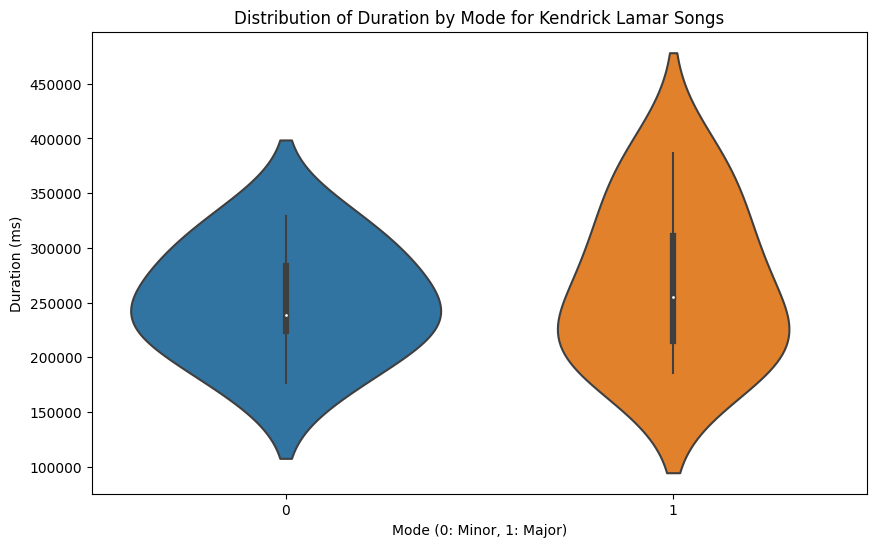

In [57]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x='Mode', y='Duration(ms)', data=df)
plt.title('Distribution of Duration by Mode for Kendrick Lamar Songs')
plt.xlabel('Mode (0: Minor, 1: Major)')
plt.ylabel('Duration (ms)')
plt.show()

It looks like the songs that are in major(which I believe indicate maybe slighlty more positive) tend to be longer.

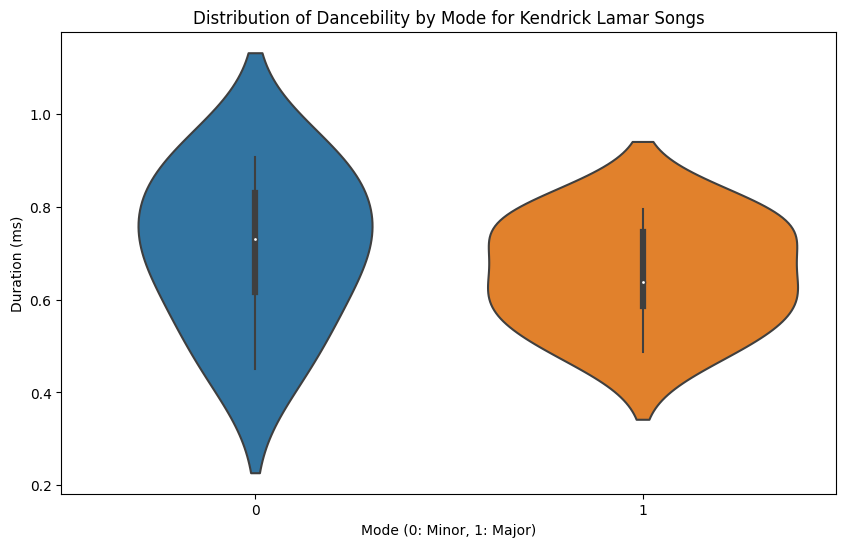

In [58]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Mode', y='Danceability', data=df)
plt.title('Distribution of Dancebility by Mode for Kendrick Lamar Songs')
plt.xlabel('Mode (0: Minor, 1: Major)')
plt.ylabel('Duration (ms)')
plt.show()

It seems the minor songs are more danceable. So my working hypothesis before we introduce the lyrics is that maybe when Kendrick lamar is making more sadder subject matter he uses minor to indicate this but then makes it shorter and more danceable to make it more palatable to his audience, or maybe even put a more positive or hopeful perspective.

# Lyrical Content

In [67]:
import csv
import lyricsgenius
cidg = 'hdebk5UajsJ59qz1t-7ukNxS3WdotgudDXt3YHcLy6y1HT01Hj-OXWh-gS67mspB'
secret_id_g = 'DagULnKFqnFxGgSr0EZdSOMEzlY9eB4TgAZDKpZ2B8Juwkn9E2o0UNtQD-ckpHDMpQkU479VsuCnVdFKfmjf1A'
genius_api = 'nYQvf62V5jOexknJ9OICT7mnwK8EaNxyPsCeoT5ZpZxhmiiFAuSZKuYS3VRYkT6h'
genius = lyricsgenius.Genius(genius_api, timeout=10)

# Only Run This Cell Block once it creates a bunch of csvs

In [63]:
import csv
import lyricsgenius
cidg = 'hdebk5UajsJ59qz1t-7ukNxS3WdotgudDXt3YHcLy6y1HT01Hj-OXWh-gS67mspB'
secret_id_g = 'DagULnKFqnFxGgSr0EZdSOMEzlY9eB4TgAZDKpZ2B8Juwkn9E2o0UNtQD-ckpHDMpQkU479VsuCnVdFKfmjf1A'
genius_api = 'nYQvf62V5jOexknJ9OICT7mnwK8EaNxyPsCeoT5ZpZxhmiiFAuSZKuYS3VRYkT6h'

genius = lyricsgenius.Genius(genius_api)
list = ['DNA', 'HUMBLE', 'Purple Hearts', 'Hood Politics', 'Alright',
'King Kunta', 'Momma', 'FEEL', 'PRIDE', 'Bitch', 'Don\'t Kill My Vibe', 'Money Trees', 'good kid', 'm.A.A.d city', 'United In Greif', 'N95', 'Die Hard']
for name in list:
    song = genius.search_song(name, 'Kendrick Lamar')
    if song:
        with open(name + ' song_lyrics.csv', 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Title', 'Artist', 'Lyrics'])
            writer.writerow([song.title, song.artist, song.lyrics])
        print('Lyrics saved to song_lyrics.csv')
    else:
        print('Song not found')

Searching for "DNA" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "HUMBLE" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "Purple Hearts" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "Hood Politics" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "Alright" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "King Kunta" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "Momma" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "FEEL" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "PRIDE" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "Bitch" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "Don't Kill My Vibe" by Kendrick Lamar...
Done.
Lyrics saved to song_lyrics.csv
Searching for "Money Trees" by Kendrick Lamar...
Done.
Lyrics saved to song

# Overall most popular words in his songs

Searching for "HUMBLE." by Kendrick Lamar...
Done.
Searching for "DNA." by Kendrick Lamar...
Done.
Searching for "Purple Hearts" by Kendrick Lamar...
Done.
Searching for "Hood Politics" by Kendrick Lamar...
Done.
Searching for "Alright" by Kendrick Lamar...
Done.
Searching for "King Kunta" by Kendrick Lamar...
Done.
Searching for "Momma" by Kendrick Lamar...
Done.
Searching for "FEEL" by Kendrick Lamar...
Done.
Searching for "N95" by Kendrick Lamar...
Done.
Searching for "PRIDE" by Kendrick Lamar...
Done.
Searching for "Bitch Don't Kill My Vibe" by Kendrick Lamar...
Done.
Searching for "Money Trees" by Kendrick Lamar...
Done.
Searching for "m.A.A.d city" by Kendrick Lamar...
Done.
Searching for "United In Greif" by Kendrick Lamar...
Done.
Searching for "good kid" by Kendrick Lamar...
Done.
Searching for "Die Hard" by Kendrick Lamar...
Done.


C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


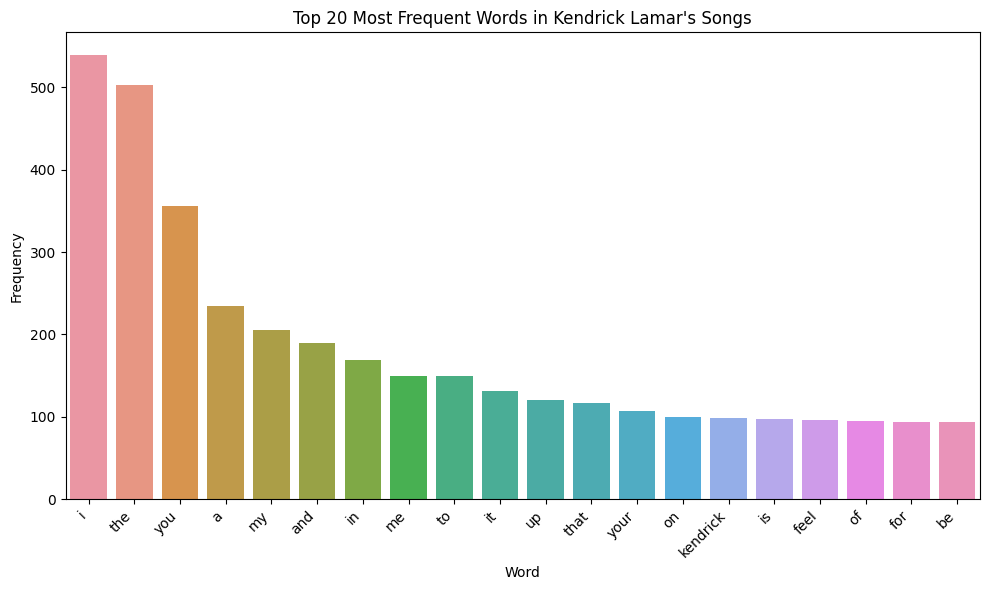

In [70]:
from collections import Counter
def get_lyrics(title, artist):
    song = genius.search_song(title, artist)
    if song:
        return song.lyrics
    else:
        return None
def preprocess_lyrics(lyrics):
    lyrics = lyrics.lower()
    lyrics = ''.join([c for c in lyrics if c.isalnum() or c.isspace()])
    return lyrics

kendrick_songs = [
    {'Title': 'HUMBLE.', 'Artist': 'Kendrick Lamar'},
    {'Title': 'DNA.', 'Artist': 'Kendrick Lamar'},{'Title': 'Purple Hearts', 'Artist': 'Kendrick Lamar'},
    {'Title': 'Hood Politics', 'Artist': 'Kendrick Lamar'}, {'Title': 'Alright', 'Artist': 'Kendrick Lamar'}, {'Title': 'King Kunta', 'Artist': 'Kendrick Lamar'}, 
    {'Title': 'Momma', 'Artist': 'Kendrick Lamar'}, {'Title': 'FEEL', 'Artist': 'Kendrick Lamar'}, {'Title':'N95', 'Artist': 'Kendrick Lamar'},
    {'Title': 'PRIDE', 'Artist': 'Kendrick Lamar'},{'Title':  'Bitch Don\'t Kill My Vibe', 'Artist': 'Kendrick Lamar'},
    {'Title': 'Money Trees', 'Artist': 'Kendrick Lamar'},{'Title': 'm.A.A.d city', 'Artist': 'Kendrick Lamar'},{'Title': 'United In Greif', 'Artist': 'Kendrick Lamar'},
    {'Title': 'good kid', 'Artist': 'Kendrick Lamar'}, {'Title': 'Die Hard', 'Artist': 'Kendrick Lamar'}

]


for song_info in kendrick_songs:
    title = song_info['Title']
    artist = song_info['Artist']
    lyrics = get_lyrics(title, artist)
    if lyrics:
        preprocessed_lyrics = preprocess_lyrics(lyrics)
        song_info['Lyrics'] = preprocessed_lyrics
    else:
        print(f"Lyrics not found for {title} by {artist}")
kendrick_songs_copy = kendrick_songs

all_lyrics = ' '.join([song['Lyrics'] for song in kendrick_songs])
word_counts = Counter(all_lyrics.split())
top_words = word_counts.most_common(20)


plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('Top 20 Most Frequent Words in Kendrick Lamar\'s Songs')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In general it seems that I is the most common word maybe this indicates a more personal music because he's talking from his perspective in terms of this in the context of the audio analysis we do know that it is a mix of major and minor with minor being slightly more common maybe he is communicating his experience the good and the bad. The other most popular are your and you I think this depends on the song when it comes to who you is supposed to be. feel is also pretty high up which means he is talking about his feelings a decent amount in his songs contextually there are no swear words in the top words.  Kendrick swears a lot in his songs but he seems to use the word feel in general more.

# Individual Songs lyrical content

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


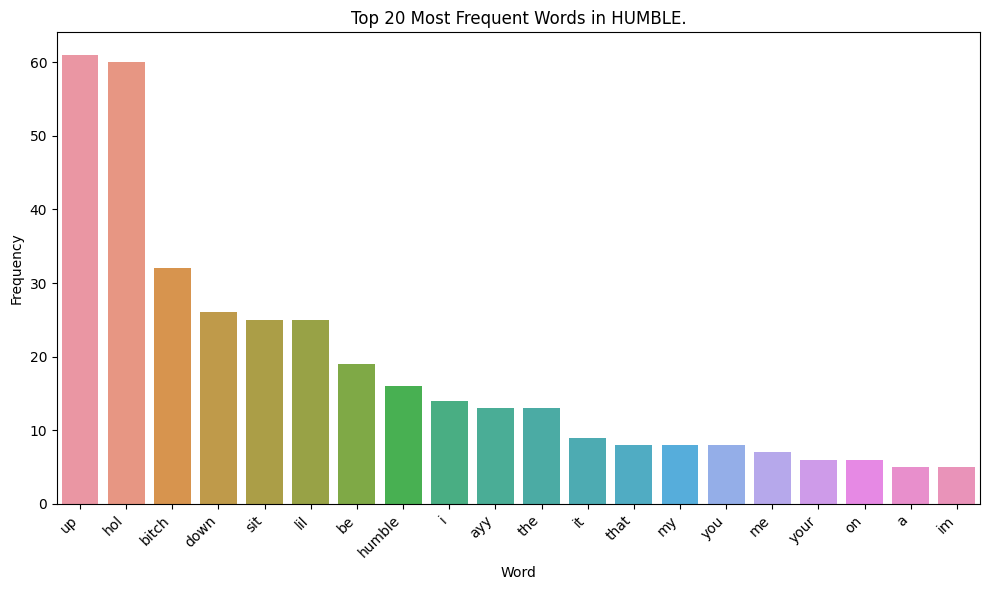

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


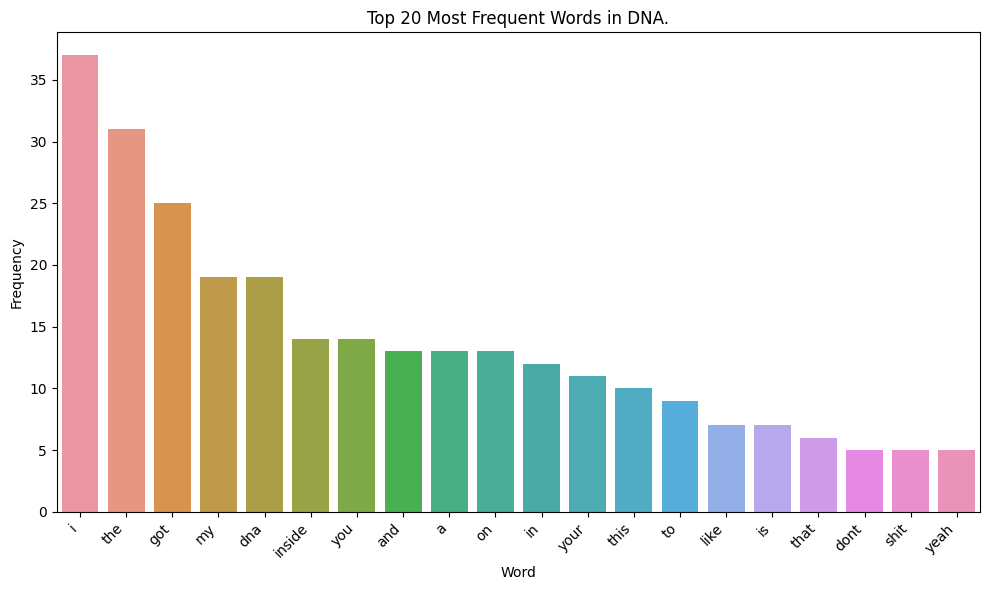

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


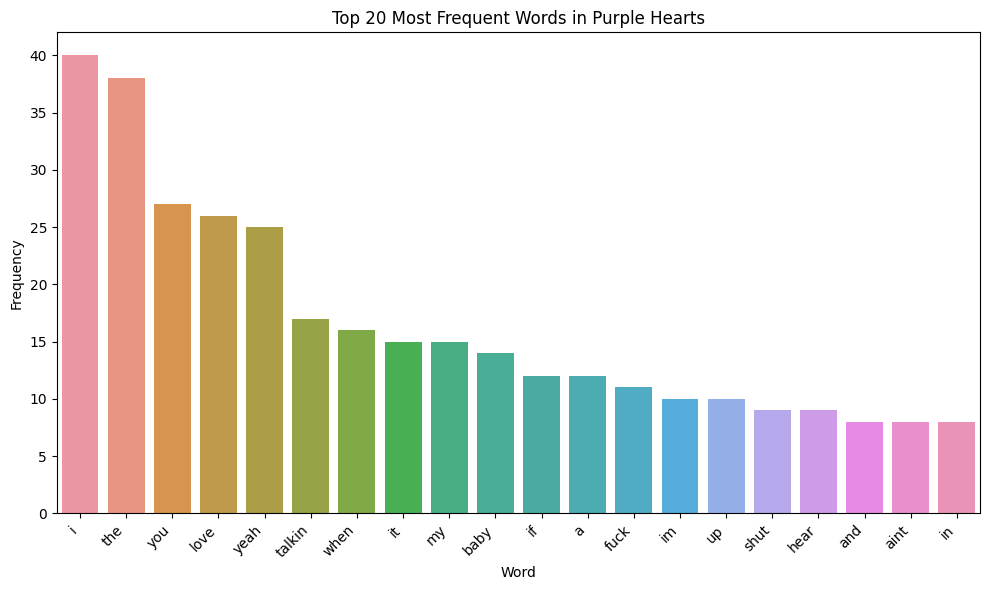

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


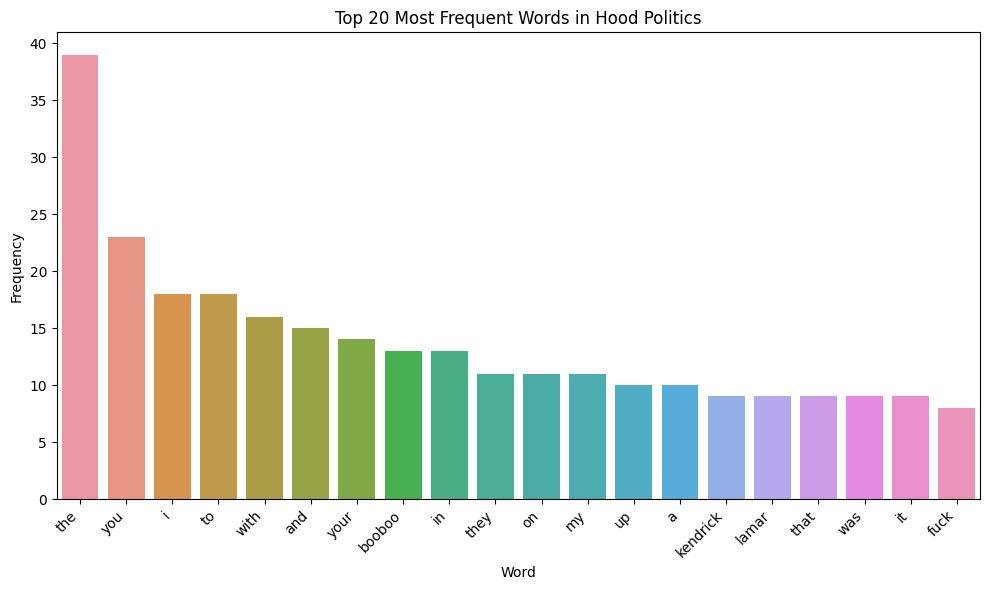

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


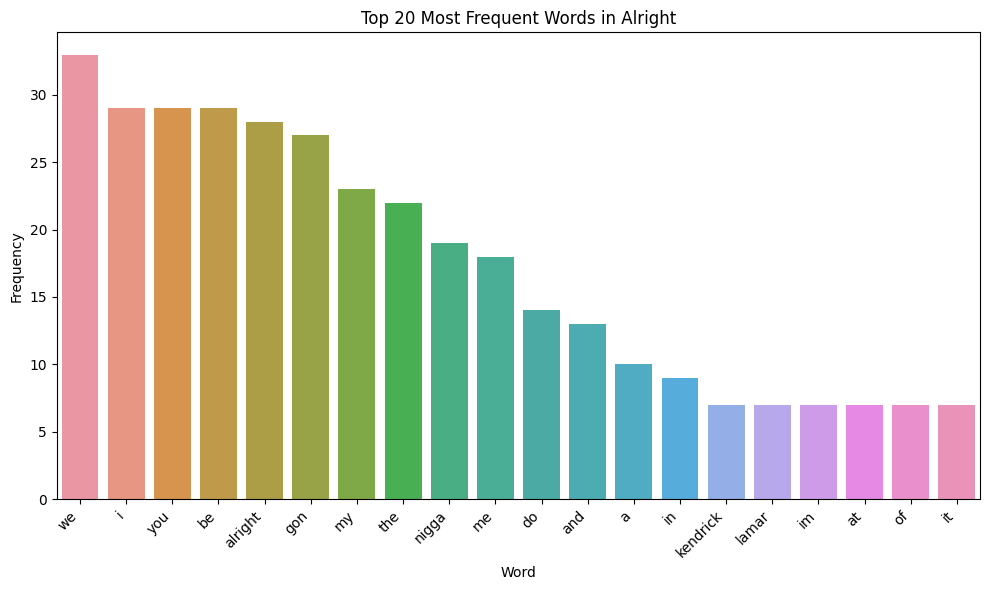

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


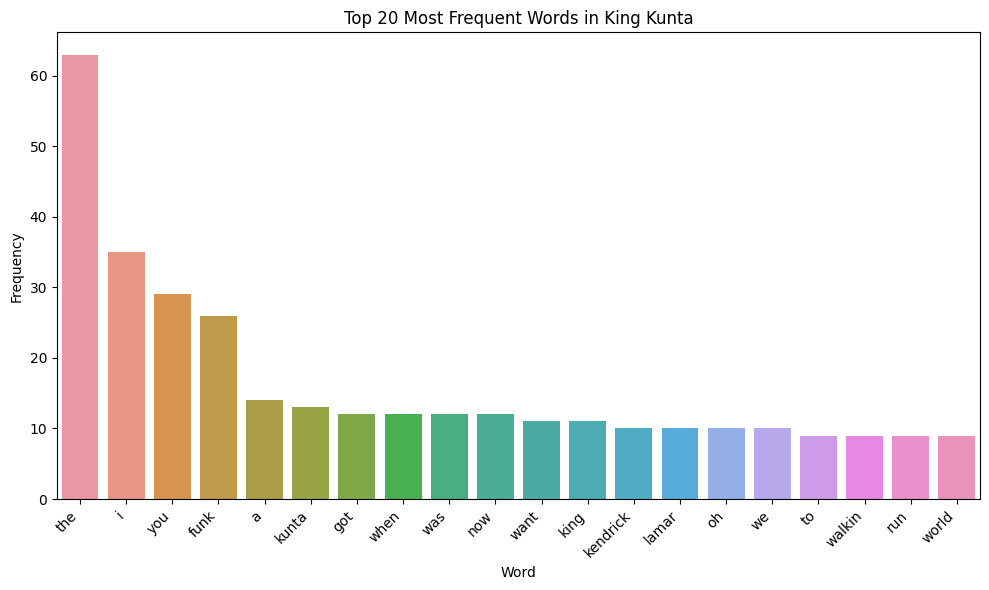

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


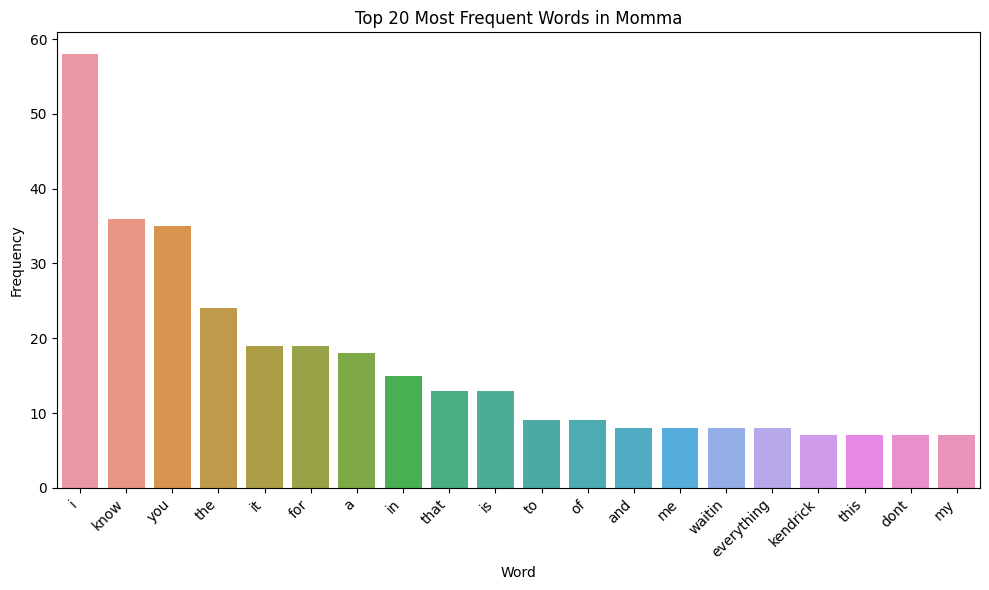

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


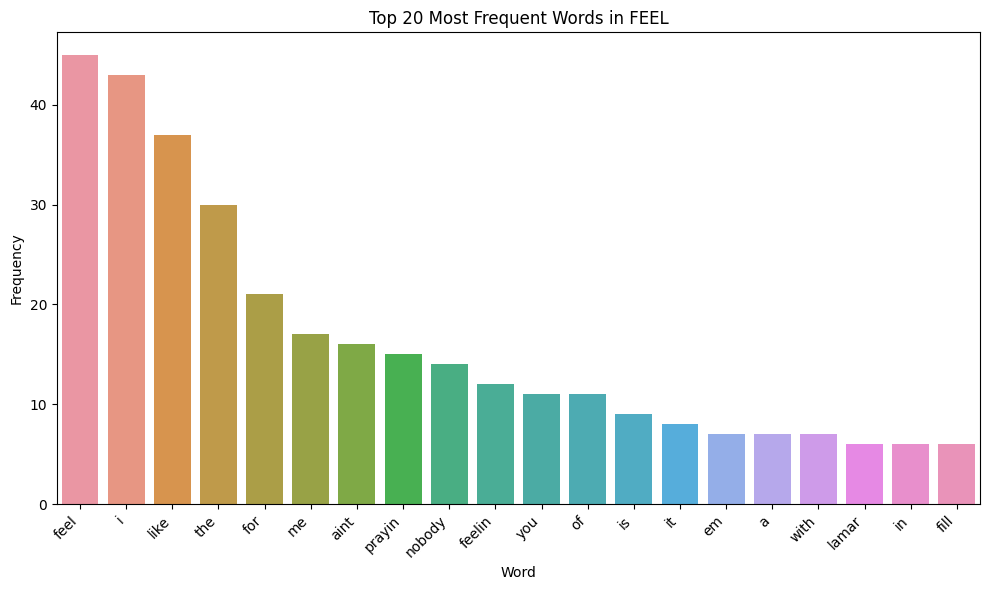

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


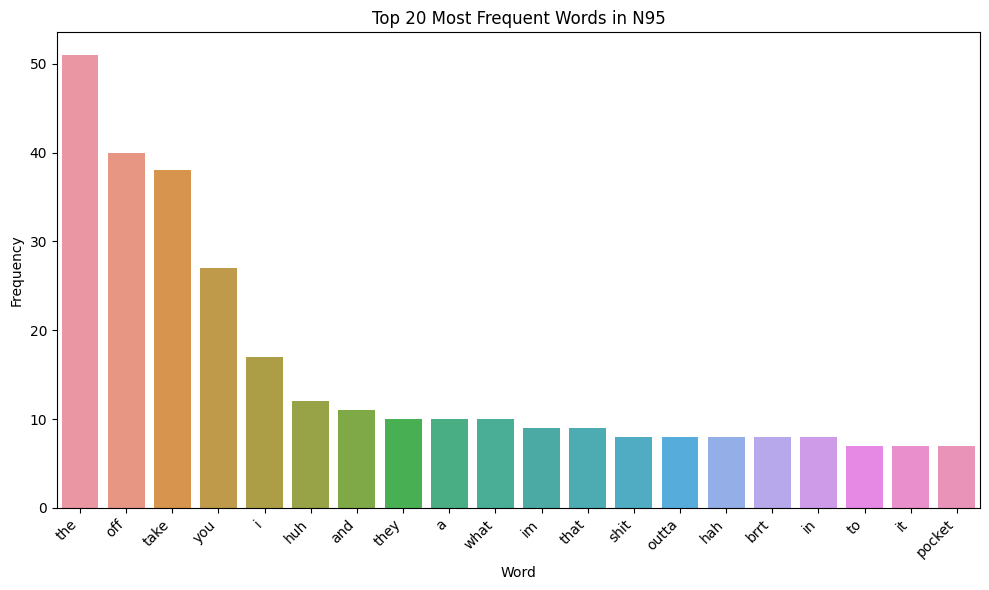

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


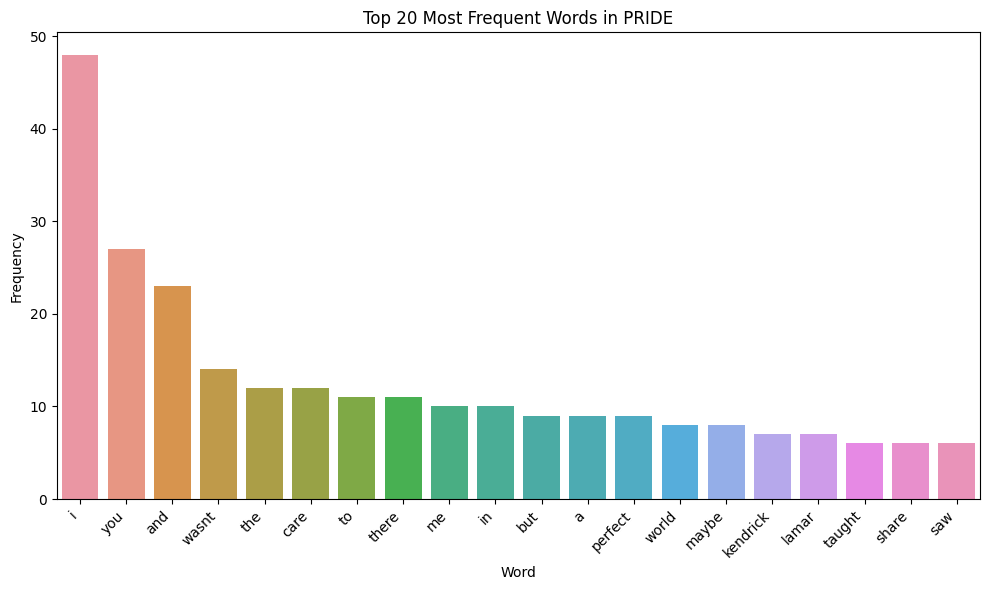

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


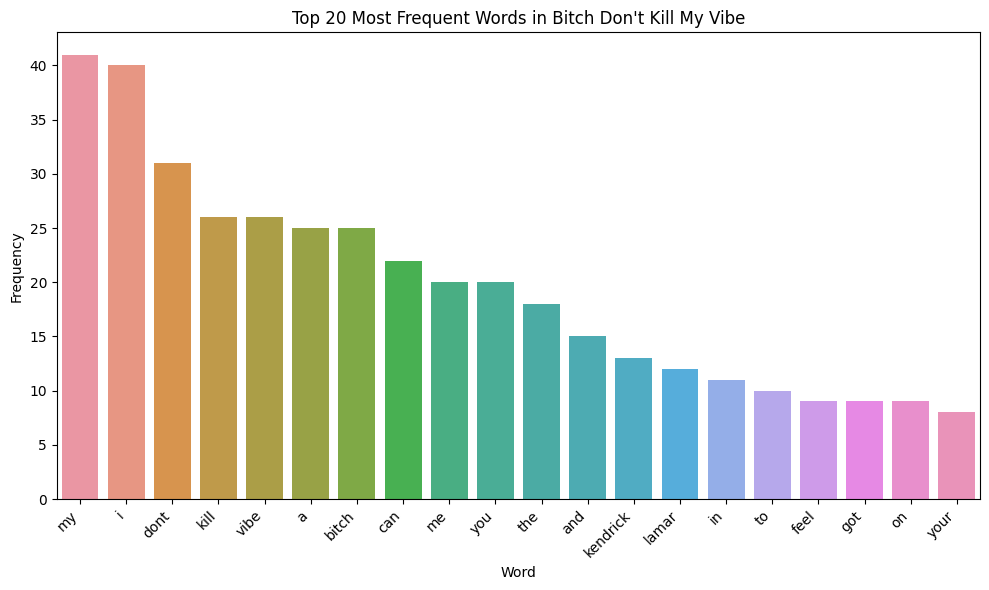

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


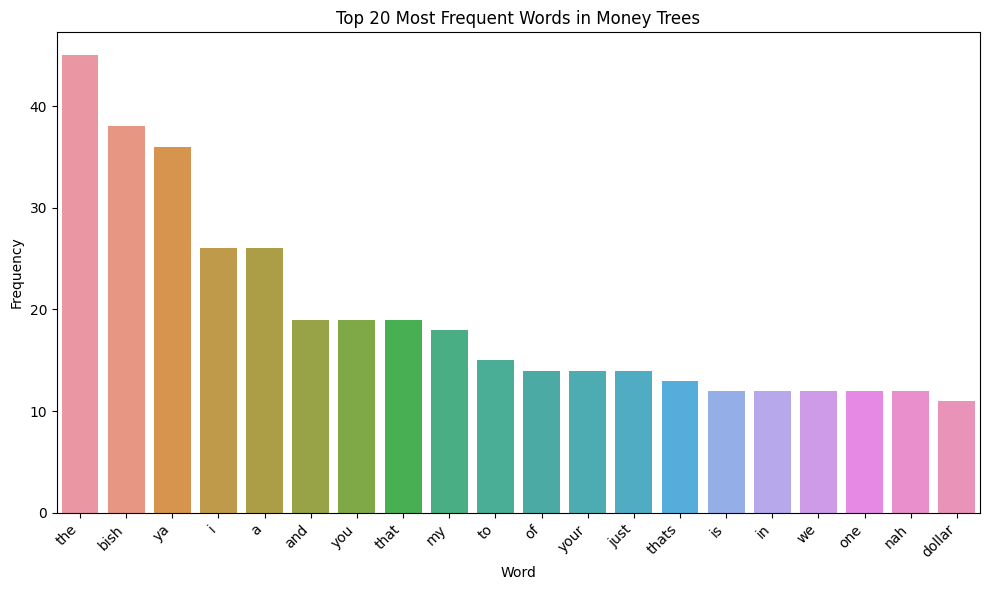

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


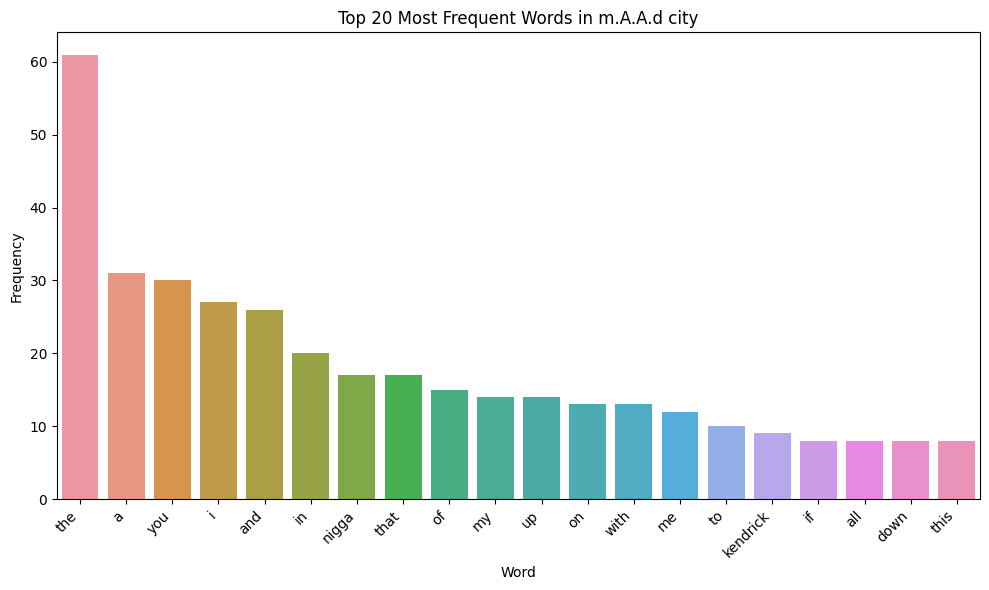

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


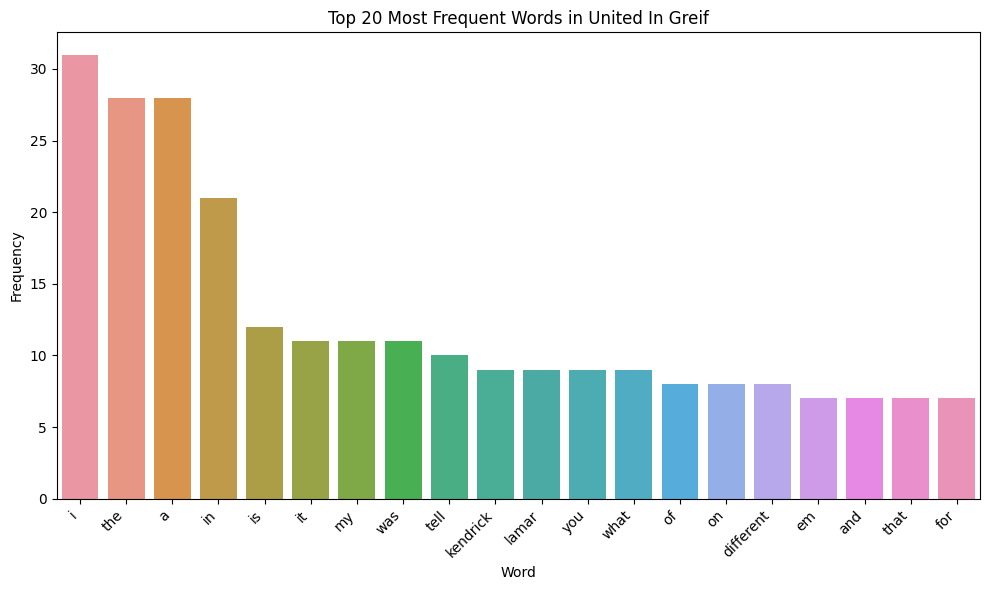

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


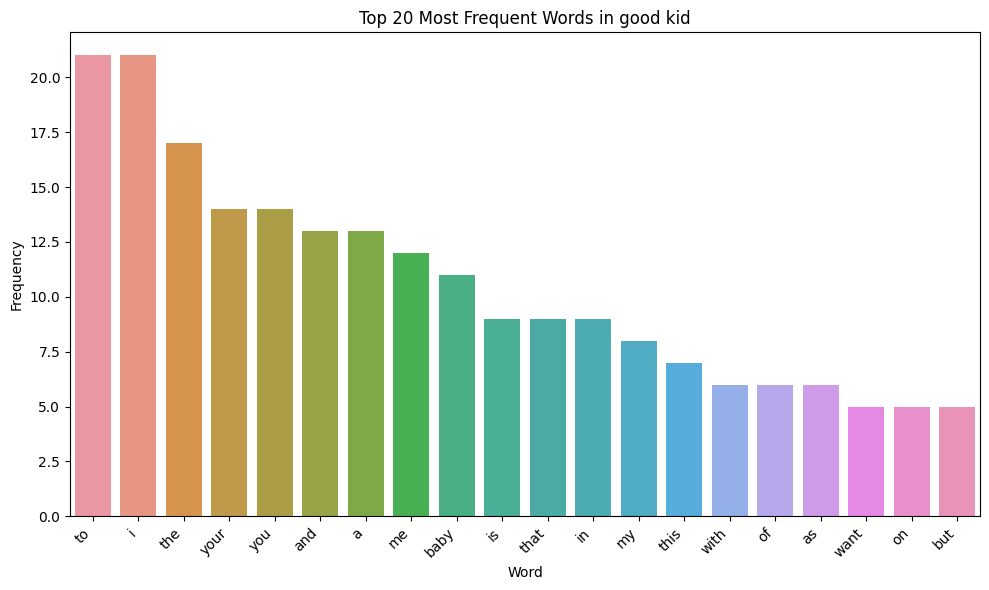

C:\Users\gwenn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


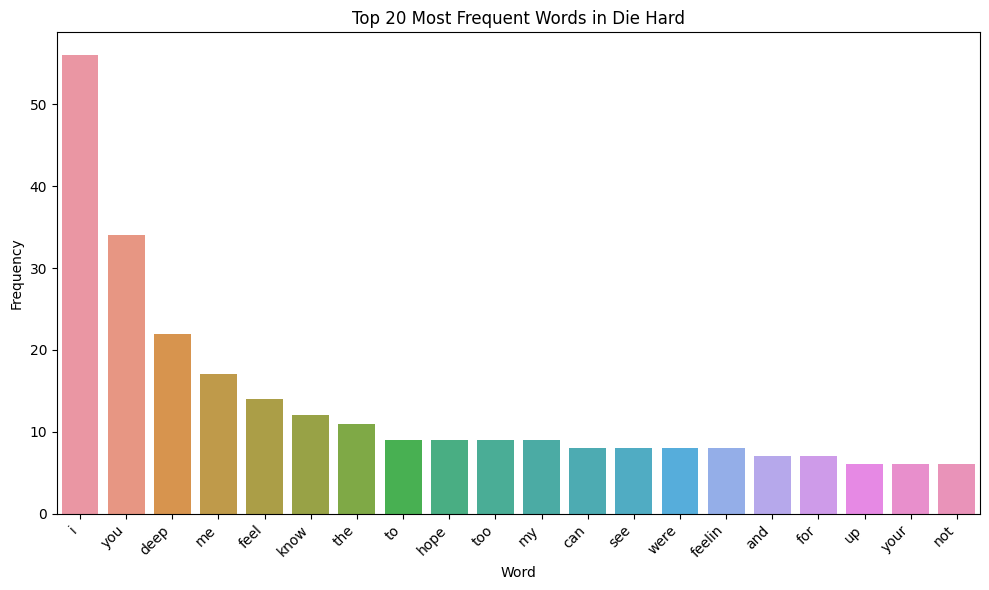

In [74]:
for song_info in kendrick_songs:
    lyrics = song_info['Lyrics']
    
    word_counts = Counter(lyrics.split())
    
    
    top_words = word_counts.most_common(20)
    
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
    plt.title(f'Top 20 Most Frequent Words in {song_info["Title"]}')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Initial Observations

I would say the most consitent words are I and you/your.  Each song might be covering a different themes so it's understanable that the lyrical content will change for each individual song but it seems to be a trend that he is talking about himself and some other 'you'. Unlike words like feel that are used a lot in one song (which probably caused it to show up in the general top 20) 'you' and 'I' are used a lot in general in his songs. I think Kendrick tends to express his experience and then reflect it on his culture in general by using the words like 'i' or 'you' along with the context of his song. DNA is a good example some of the songs most common words are 'i', 'you' and 'dna'. Throughout the song he is talking about what he has in his dna. However, he does not mean the word 'dna' literally he uses the word 'DNA' to metaphorically talk about his culture.  He does this in part because many black americans do share ancestory in their dna but metaphorically using the word 'dna' instead of culture is more poignant as dna itself is extremely unique he's trying to celebrate and articulate the many positives and negatives and general uniqueness of his culture.  When he says 'i got royalty and loyalty inside my dna' he is saying 'i' but he metaphorically he means 'we'. He's speaking on his culture and other black americans this is further shown when he affirmss 'this is my heritage' and affirms his 'dna's not for immitation'. Someone's DNA cannot really be immitated but he's saying his culture is not for imitation. In this song 'you' is more used to be the people he is trying to educate on understanding his culture saying in multiple points in the song he expresses how 'you' doesn't understand or know the depth of what they are critiquing about his culture. 

# Initial Takeaway (Before looking at both together)

It seems that Kendrick uses words like I and you to create a sort of relationship with the audience as explained above in the song DNA's case 'I' does not really just mean Kendrick it means kendrick and other black americans his 'dna' is black american culture the 'you' is him speaking to those he feels unfairly critique or misunderstand his culture. Using words like 'I' to functionally works as 'we' and 'dna' to mean culture I think is the way he lyrically expresses the deep communitiy in black american culture as Kendrick uses words that are more close to him or entrinstic like his dna or 'I' to communicate community.  'You' is more distance this is to communicate differences or distance in perspective.  So my general takeaway with just the lyrics before I consider both of them (audio and lyrical) is that Kendrick uses words that are at face value in regard to himself but functionally and metaphorically are meant to mean people apart of his culture in order communicate closeness.

# Analysis with Lyrics and Audio

<Axes: xlabel='Track Name', ylabel='Energy'>

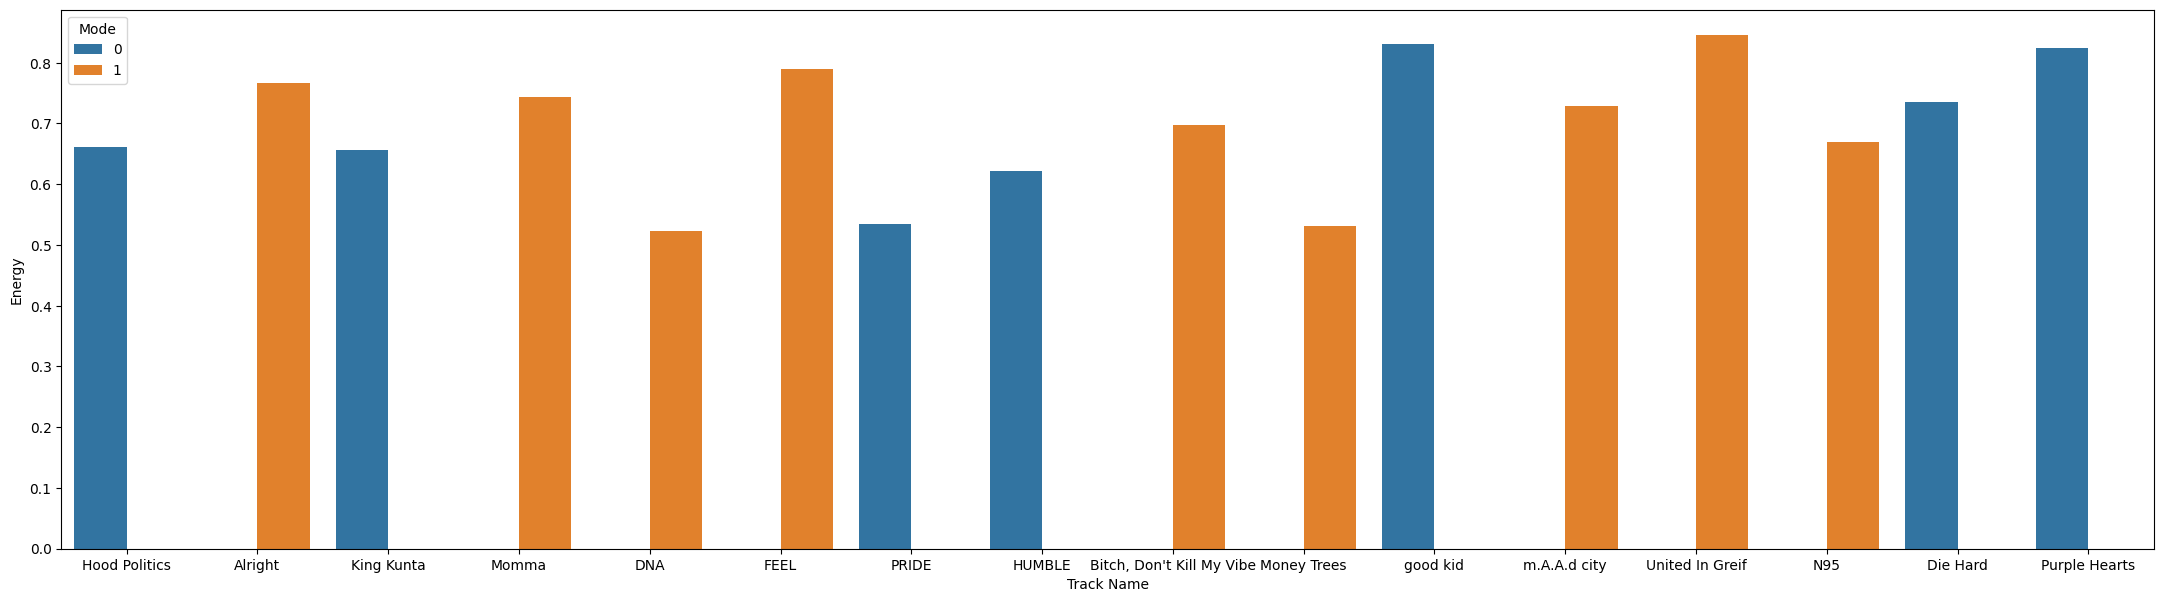

In [88]:
plt.figure(figsize=(27, 7))
sns.barplot(data=df, x='Track Name', y='Energy', hue='Mode')

A song like DNA is in Major cord so it's positive which makes sense musically he is essentially displaying that he is proud of his culture noticeably it is lower in energy though. Maybe it is like that to show steady confidence. It is in 4/4 time so maybe he did this to come off as deliberate

<Axes: xlabel='Track Name', ylabel='Speechiness'>

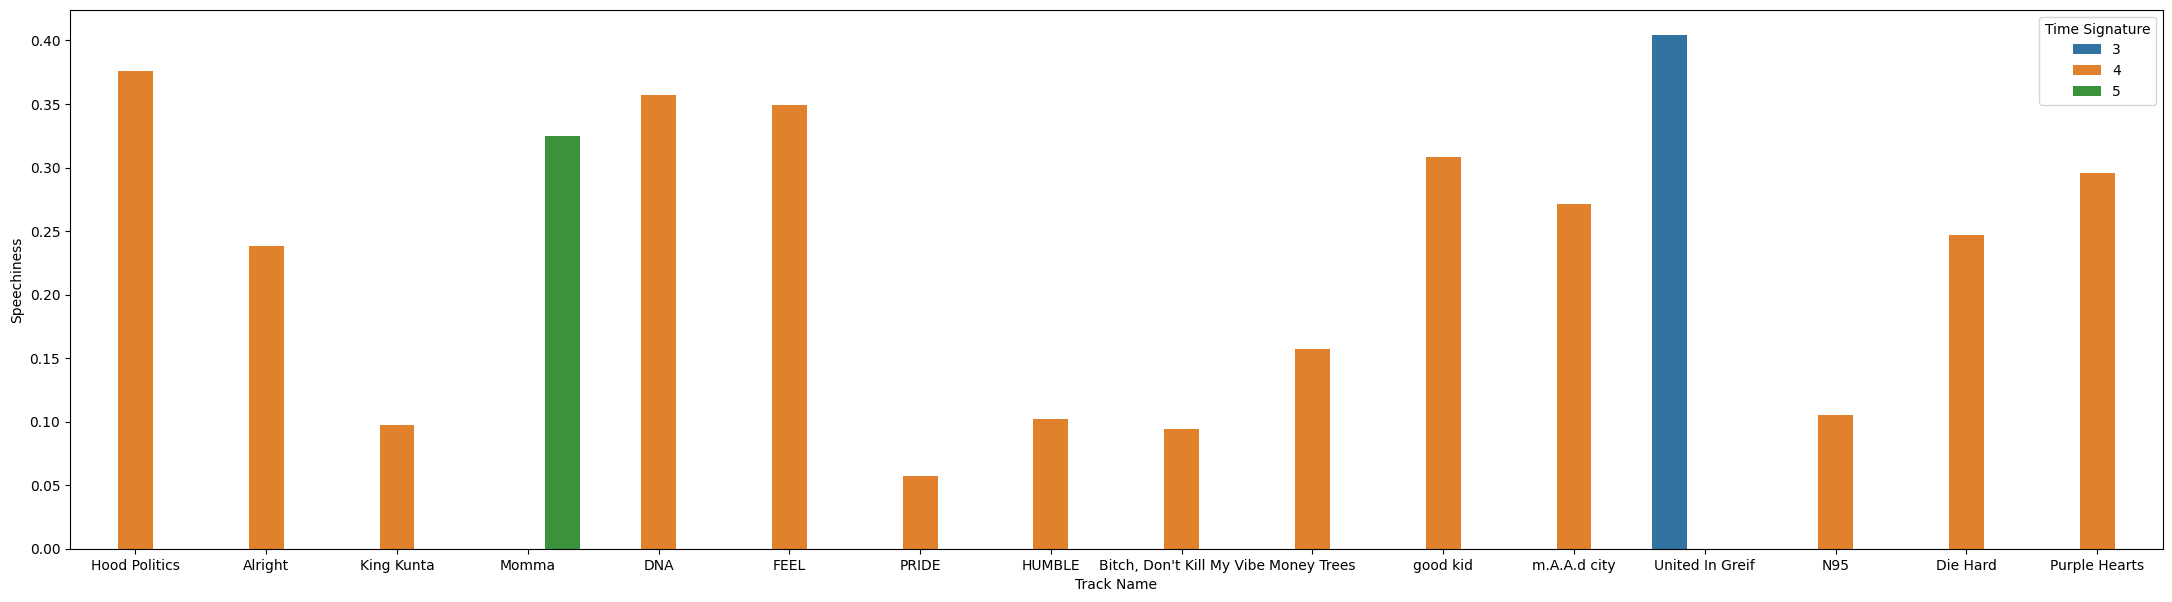

In [90]:
plt.figure(figsize=(27, 7))
sns.barplot(data=df, x='Track Name', y='Speechiness', hue='Time Signature')

# Time Signature analysis 3/4 and 5/4

It makes sense that DNA is high in speechiness. Given the message of his song is him articulating his different perspectives of his culture. In terms of time signature it is not surprise DNA is 4/4 but I think it is facinating how Momma which is in 5/4 time and United in Greif is in 3/4 time. In terms of United in Grief it's from his most recent album which is probably one of is most personal albums because he is reflecting on his experiences in therapy. Despite the personal nature of this album it still relate to some aspects of his cultural expression and political viewpoint in some way. Like encouraging therapy that is often not normalized in some parts of the his culture and pointing out some internalized misogyny he has which is a result of his culture. Perhaps he put it in 3/4 time to add a more emotional sway or weight to his flow. As this is the song about deep reflection that analyze all of the factors that caused him to make desicions. One of the words that is commonly used in United in grief's graph is 'different' which comes from the repeated line 'I greive different' and 'we all greive different'. I think the word 'different' again like in DNA has more weight than just literally greiving different. I think it is -on the surface- expressing the idea of how his life expreiences effect his current choices. However, from the lense of culture I think (especially given the line 'we all greive different') he is saying the culture has to view greif differently as he is talking about generational truama and is encouraging the idea of therapy.     For the song Momma it is most obviously supposed to be a more clumsy beat (the intro of the song points it out) so 5/4 is perfect for it. This track is about him reflecting on his personal growth and career growth. He is reflecting back when he was more inexperienced but also paralleling his inexperience to his current life and ego.  The clumsy flow of the song is to showcase the inexperience of his earlier self the second most used word in this song is 'know'. Kendrick uses the word 'know' as deeper than actually just knowing or having knowledge. Culturally he is drawing a connection from his current self and past self with the beat and lyrics to show two things one him 'knowning' something means he still has a connection to his roots and two returning back home is important because he still needs to reminded of his roots and 'know' about his culture and remember the people he came from. The takeaway from this is that he uses the 5/4 beat to represent his younger self and his initial tie to his culture he then uses the word 'know' as a way to indicate his level of connection to his culture.

# Quick Comments on Low Spechiness analysis

PRIDE has the lowest in spechiness meaning he is not speaking as much in this song as others. I think that this is because the song wants the listener to reflect over the corruption of PRIDE. In this song he is more reflective on himself with a sort of warning to the listener.  Most of his songs he reflects on himself then onto the audience but most of this song is how he has let his fame and success go to his head or he is worried about that happening. He goes further also remarking about how he doesn't care enough about the world and that in a perfect world he would. The most used words are things like 'i', 'you', 'care', 'perfect', 'wasn't' and 'world'. Although 'you' is used in this context seems more directed towards himself like the first few lines like 'prides going to be the death of you' is talking to himself mainly but sort of warning the audience.  the word 'wasn't' comes into play with the absence of spoken word. In this song there are parts where the sound is unclear and whispers of repeated words. 'Maybe I wasn't there' and 'I wasn't taught to share' are eerie and meant to haunt the listener like the threat of pride haunts kendrick lamar it's meant to make them question and reflect. because in the song he keeps repeating how in a perfect world he would care but this world isn't perfect so he's being haunted about not being there for people or not being taught to share which is just a metaphor of him not being caring enough about others. It could be interpreted that he is warning the listener to not fall into the trappings of Pride which is why the song is in minor (for a more eery feeling) and the non spoken parts are eery whispers.  Interestingly enough when he has low speechiness songs I think he tends to rely more on the words to paint a picture to the audience using them in production instead of his rap bars.

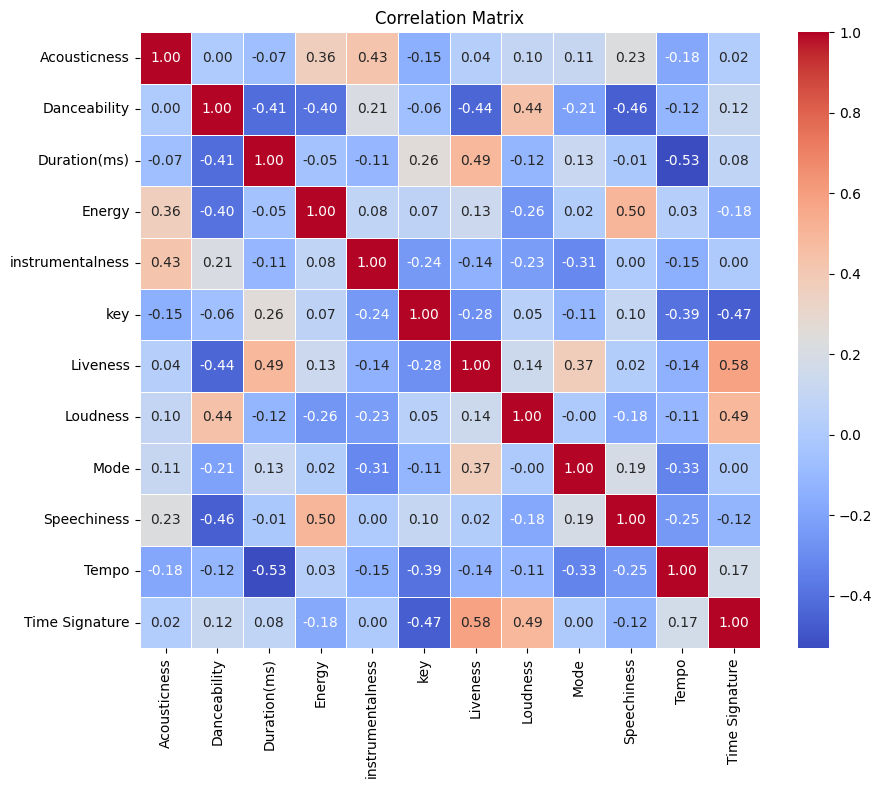

In [92]:
df_copy = df
columns_to_exclude = ['Track Name', 'Id', 'Albulm']  # Replace with the names of columns to exclude
numeric_df = df_copy.drop(columns=columns_to_exclude)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

I am going to ignore time signature correlation since there are only two cases where time signature isn't 4 so it will look like a artificially higher or lower correlation than is actually the case. This correlation matrix is to check commonalities between audio features. I am looking for features over .50 or under -.50. So looks like we can take a look at speechiness and energy.

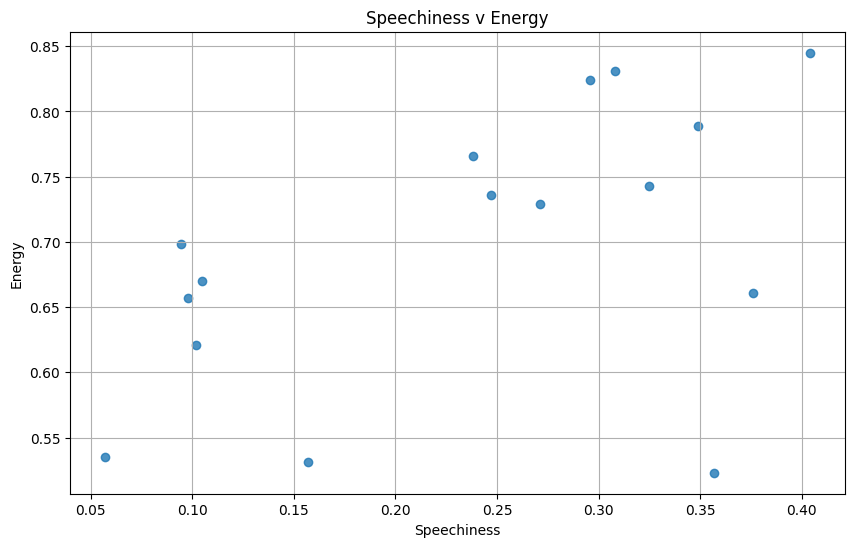

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Speechiness"], df["Energy"], alpha=0.8)
plt.title('Speechiness v Energy')
plt.xlabel('Speechiness')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

Decent correlation with a decent amount of outliers I think this fits with my earlier hypothesis that when he has more sad music he'll make it shorter and more energetic maybe that is the same for speechiness higher speechiness from above seem to indicate him having the audience reflect more. 

# Conclusion/Summary and Takeaway or What I have learned

Kendrick Lamar seems to make a variaty of choices when it comes the lyrical and audio features he chooses for each song.  I did not expect to see much correlation in general because with art and music creators make choices based on what feels right but I think I was able to discern some ways he expresses his culture and political views through his lyrical and audio feature content. Firstly it's important to understand the general way he tends to set up his songs. I think he has a tendency to frame his songs and the expression of culture and polictical views in almost an ever expanding circle. So first he will be reflecting or talking about something personal then he will expand that and  reflect on it in terms of his culture and history and then that extends to his political views.  I mentioned the song dna a lot but you can see he first initially seems to be talking about his experience then he starts mentioning how he got this experience from his heritage which starts to express his views on culture then from that he can make political statements like showcasing he's proud of his culture or that his culture is not meant to be imitated. This expanding is sometimes more subtle and thats where most of the musical elements work with the lyrics even in dna we can discern a political message and perspective Kendrick Lamar has on his culture because his music is in a solid stable 4/4 time as opposed to 3/4 or 5/4.  It's mode is in major indicating a positive tone and its speechiness is high meaning he wants to speak clearly and declare his perspective on his culture.  The lyrical content works with the music as I explained earlier how he uses the words 'dna' and 'i' to explain a connection to his culture.  He then uses the word 'you' to critique common criticisms of black culture that he disagrees with this in turn lays out his political views.  Speaking more boardly I have pointed out situations where he will change the typical 4/4 rhythm which comes off a stable to 3/4 more waltz like emotional or 5/4 more clumsy to convey tone or emotion to the listener.  He will also pick if something is supposed to be in major or minor depending on his goals for the song.  Many of his songs that are in minor key indicating they have more heavy emotional or eerie vibe he will balance out by making them shorter and more danceable I think one example of this is his song "Alright" which was about the Black Live Matter Movement was a very upbeat and hopeful song. You can see it in the graph for alright 'we' and 'alright' are some of the most frequently used words despite the subject matter. I think his tendency to do this shows that even though he is covering some dark topics he expresses a more hopeful perspective on black american culture and politics. Another thing that I cover is that songs that tend to be low in speechiness seem to be more self reflective and his message to the audience is more of a warning so he lets his the production qualities of the track shine so the listener feels what he is feeling.  Overall, he uses so many different features in different ways to convey to an audience his perspective but I would say he uses Mode(if a song is in major or minor), time signature(3/4, 4/4, 5/4), words with depth (like choosing initially simple words for double meanings), energy, danceibility and how much words he actually puts in his track (speechiness) to convey a proud yet critical and hopeful perspective on black american culture and politics. 

# Final say What I've learned

I have learned the depth of choices that kendrick lamar makes when creating a track and the multi layered messages he has in his music I bet there are many more musical and lyrical elements and tricks that he employs that can be further explored intially starting out with the article on how he articulates the different ways of resistance to his audience I have realized he articulates a lot of values to his audience through metaphors and audio features in more ways the just general lyricism.

# Works Cited

Love, Bettina L. “Good Kids, mad cities.” Cultural Studies ↔ Critical Methodologies, vol. 16, no. 3, 3 Mar. 2016, pp. 320–323, https://doi.org/10.1177/1532708616634837. 